In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:13<00:00, 194MB/s]
100% 2.70G/2.70G [00:13<00:00, 209MB/s]


In [4]:
!pip install tensorflow
!pip install matplotlib
!pip install pandas
!pip install seaborn

In [5]:
#Importing required libraries
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [6]:
#unziping the folder
zip_ref = zipfile.ZipFile("new-plant-diseases-dataset.zip", "r")
zip_ref.extractall("plant disease dataset")
zip_ref.close()

**Data preprocessing**

In [7]:
# Data Preprocessing
# Image data loading
train_set = tf.keras.utils.image_dataset_from_directory(
    'plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 70295 files belonging to 38 classes.


In [8]:
#validation image processing
valid_set = tf.keras.utils.image_dataset_from_directory(
    'plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [9]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
valid_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
for x,y in train_set: # printing X&Y of dataset
  print(x)
  print(y)
  break

tf.Tensor(
[[[[196. 189. 183.]
   [197. 190. 184.]
   [198. 191. 185.]
   ...
   [182. 173. 166.]
   [178. 169. 162.]
   [178. 169. 162.]]

  [[195. 188. 182.]
   [198. 191. 185.]
   [200. 193. 187.]
   ...
   [186. 177. 170.]
   [186. 177. 170.]
   [188. 179. 172.]]

  [[202. 195. 189.]
   [205. 198. 192.]
   [208. 201. 195.]
   ...
   [186. 177. 170.]
   [185. 176. 169.]
   [187. 178. 171.]]

  ...

  [[122. 103.  97.]
   [129. 110. 104.]
   [132. 113. 107.]
   ...
   [133. 116. 109.]
   [120. 103.  96.]
   [114.  97.  90.]]

  [[114.  95.  89.]
   [122. 103.  97.]
   [127. 108. 102.]
   ...
   [152. 135. 128.]
   [148. 131. 124.]
   [132. 115. 108.]]

  [[127. 108. 102.]
   [125. 106. 100.]
   [121. 102.  96.]
   ...
   [137. 120. 113.]
   [140. 123. 116.]
   [118. 101.  94.]]]


 [[[140. 135. 158.]
   [116. 111. 134.]
   [147. 143. 166.]
   ...
   [104.  99. 121.]
   [ 99.  94. 116.]
   [ 98.  93. 115.]]

  [[145. 140. 163.]
   [ 98.  93. 116.]
   [183. 179. 202.]
   ...
   [102.  

In [12]:
for x,y in valid_set: # printing X&Y of dataset
  print(x)
  print(y)
  break

tf.Tensor(
[[[[140. 155. 196.]
   [136. 151. 192.]
   [133. 148. 189.]
   ...
   [122. 126. 163.]
   [119. 123. 160.]
   [ 89.  93. 130.]]

  [[134. 149. 190.]
   [131. 146. 187.]
   [129. 144. 185.]
   ...
   [109. 113. 150.]
   [133. 137. 174.]
   [132. 136. 173.]]

  [[131. 146. 187.]
   [129. 144. 185.]
   [127. 142. 183.]
   ...
   [ 93.  97. 134.]
   [111. 115. 152.]
   [114. 118. 155.]]

  ...

  [[119. 140. 193.]
   [118. 139. 192.]
   [117. 138. 191.]
   ...
   [104. 115. 160.]
   [ 86.  97. 142.]
   [ 79.  90. 135.]]

  [[122. 143. 196.]
   [121. 142. 195.]
   [120. 141. 194.]
   ...
   [ 82.  93. 138.]
   [ 72.  83. 128.]
   [ 78.  89. 134.]]

  [[125. 146. 199.]
   [124. 145. 198.]
   [123. 144. 197.]
   ...
   [ 96. 107. 152.]
   [ 82.  93. 138.]
   [ 77.  88. 133.]]]


 [[[110.  97. 107.]
   [118. 105. 115.]
   [118. 105. 115.]
   ...
   [133. 121. 125.]
   [128. 116. 120.]
   [123. 111. 115.]]

  [[136. 123. 133.]
   [140. 127. 137.]
   [142. 129. 139.]
   ...
   [125. 1

In [13]:
for x,y in train_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[181. 175. 177.]
   [180. 174. 176.]
   [179. 173. 175.]
   ...
   [191. 183. 181.]
   [192. 184. 182.]
   [192. 184. 182.]]

  [[182. 176. 178.]
   [181. 175. 177.]
   [180. 174. 176.]
   ...
   [192. 184. 182.]
   [193. 185. 183.]
   [194. 186. 184.]]

  [[182. 176. 178.]
   [182. 176. 178.]
   [182. 176. 178.]
   ...
   [193. 185. 183.]
   [195. 187. 185.]
   [196. 188. 186.]]

  ...

  [[ 86.  81.  77.]
   [ 84.  79.  75.]
   [ 82.  77.  73.]
   ...
   [120. 112. 109.]
   [121. 113. 110.]
   [122. 114. 111.]]

  [[ 87.  82.  78.]
   [ 86.  81.  77.]
   [ 85.  80.  76.]
   ...
   [118. 110. 107.]
   [117. 109. 106.]
   [116. 108. 105.]]

  [[ 86.  81.  77.]
   [ 87.  82.  78.]
   [ 88.  83.  79.]
   ...
   [116. 108. 105.]
   [114. 106. 103.]
   [112. 104. 101.]]]


 [[[  4.   0.   2.]
   [  5.   0.   3.]
   [ 11.   5.   9.]
   ...
   [  6.   0.   0.]
   [  6.   0.   0.]
   [  6.   0.   0.]]

  [[184. 178. 182.]
   [178. 172. 176.]
   [179. 173. 177.]
   ...
   [143. 1

**Building Model Arcitecture**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
model = Sequential()

**Building Convolution Layer**

In [16]:
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [18]:
model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [19]:
model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [20]:
model.add(Conv2D(filters=256, kernel_size=(3,3),padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [21]:
model.add(Conv2D(filters=512, kernel_size=(3,3),padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [22]:
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1500,activation='relu'))

In [25]:
model.add(Dropout(0.4))

In [26]:
#output layer
model.add(Dense(units=38,activation='softmax')) #using softmax as activation function because it gives each class some value

In [27]:
from keras import optimizers

In [28]:
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#adam function default learning rate is 0.001

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,137,930 (31.04 MB)

 Trainable params: 8,137,930 (31.04 MB)

 Non-trainable params: 0 (0.00 B)

**Training Model**

In [30]:
training_history = model.fit(x=train_set,validation_data=valid_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 44ms/step - accuracy: 0.3782 - loss: 2.2056 - val_accuracy: 0.8690 - val_loss: 0.4160
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.8327 - loss: 0.5306 - val_accuracy: 0.9079 - val_loss: 0.2835
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9059 - loss: 0.2930 - val_accuracy: 0.9547 - val_loss: 0.1386
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9375 - loss: 0.1957 - val_accuracy: 0.9550 - val_loss: 0.1425
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9519 - loss: 0.1458 - val_accuracy: 0.9664 - val_loss: 0.1055
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9638 - loss: 0.1104 - val_accuracy: 0.9867 - val_loss: 0.0401
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9700 - loss: 0.0912 - val_accuracy: 0.9900 - val_loss: 0.0316
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9755 

Model evaluation

In [31]:
#Model Evaluation on train set
train_loss,train_acc = model.evaluate(train_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9897 - loss: 0.0300


In [32]:
print(train_loss,train_acc)

0.02824973315000534 0.9906536936759949


In [33]:
#model Evaluation on valid set
val_loss,val_acc = model.evaluate(valid_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9908 - loss: 0.0277


In [34]:
print(val_loss,val_acc)

0.028249753639101982 0.9906536936759949


saving model

In [35]:
model.save("trained_model.h5")

In [36]:
#saving model to drive

model.save('/content/drive/MyDrive/trained_model.h5')


In [37]:


# saving model to drive
model.save('/content/drive/MyDrive/trained_model.keras')


In [38]:
training_history.history

{'accuracy': [0.5856888890266418,
  0.8545273542404175,
  0.9152002334594727,
  0.9423714280128479,
  0.9565118551254272,
  0.9648623466491699,
  0.9708229899406433,
  0.9752898216247559,
  0.9798847436904907,
  0.9822320342063904],
 'loss': [1.4135830402374268,
  0.45432981848716736,
  0.2649313509464264,
  0.1815023273229599,
  0.13400401175022125,
  0.1080552190542221,
  0.08984910696744919,
  0.07644416391849518,
  0.06416754424571991,
  0.05579358711838722],
 'val_accuracy': [0.868994951248169,
  0.9079166650772095,
  0.9547051787376404,
  0.9550323486328125,
  0.9663702845573425,
  0.9867416024208069,
  0.9900135397911072,
  0.9853474497795105,
  0.9913222789764404,
  0.9906536936759949],
 'val_loss': [0.4160284996032715,
  0.2835432291030884,
  0.13857103884220123,
  0.1425115168094635,
  0.10553634911775589,
  0.04006621241569519,
  0.031576842069625854,
  0.047430358827114105,
  0.02683311142027378,
  0.02824975550174713]}

In [39]:
#Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

#Accuracy Visualization

In [40]:
epochs = [i for i in range(1,11)]

In [41]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

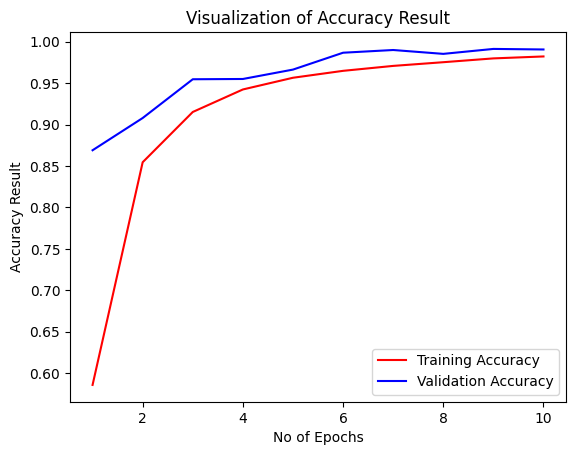

In [42]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Other Metrics for model evaluation

In [43]:
class_name = valid_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [44]:
#using test set as validation set
test_set = tf.keras.utils.image_dataset_from_directory(
    'plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [45]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


(array([[1.0000000e+00, 3.3184549e-11, 7.7932310e-14, ..., 4.3697884e-18,
         4.5244074e-16, 6.6729319e-16],
        [9.9996746e-01, 2.4971423e-05, 9.3102717e-09, ..., 1.0750496e-11,
         9.4902336e-11, 1.7871544e-09],
        [1.0000000e+00, 1.8847730e-09, 1.5797693e-12, ..., 3.9989145e-18,
         2.1279070e-14, 1.1710479e-13],
        ...,
        [2.1211749e-10, 1.6416214e-12, 3.1933918e-09, ..., 1.5846605e-11,
         3.5777197e-12, 9.9999344e-01],
        [8.6979882e-11, 4.5050796e-14, 8.4746335e-11, ..., 7.7505204e-11,
         5.9792050e-12, 9.9999988e-01],
        [8.3253987e-10, 6.4452062e-11, 3.7349230e-09, ..., 2.4864486e-09,
         4.5057980e-08, 9.3447173e-01]], dtype=float32),
 (17572, 38))

In [46]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [47]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [48]:
true_categories = tf.concat([y for x,y in test_set],axis=0).numpy().flatten()
true_categories

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)

In [49]:
Y_true = tf.argmax(true_categories).numpy()
Y_true

17091

In [50]:
Y_true = true_categories

In [51]:
predicted_categories = predicted_categories.numpy()

**Calculating Precision,Recall,accuracy**

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.98      0.97       504
                                 Apple___Black_rot       0.99      1.00      1.00       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       0.99      0.93      0.96       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.97      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.94      0.

In [54]:
CM = confusion_matrix(Y_true,predicted_categories) #refered from the sklearn documentation
CM

array([[492,   0,   0, ...,   0,   0,   0],
       [  0, 497,   0, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   0, ...,   0,   0, 436]])

**Confusion Matrix Visualization**

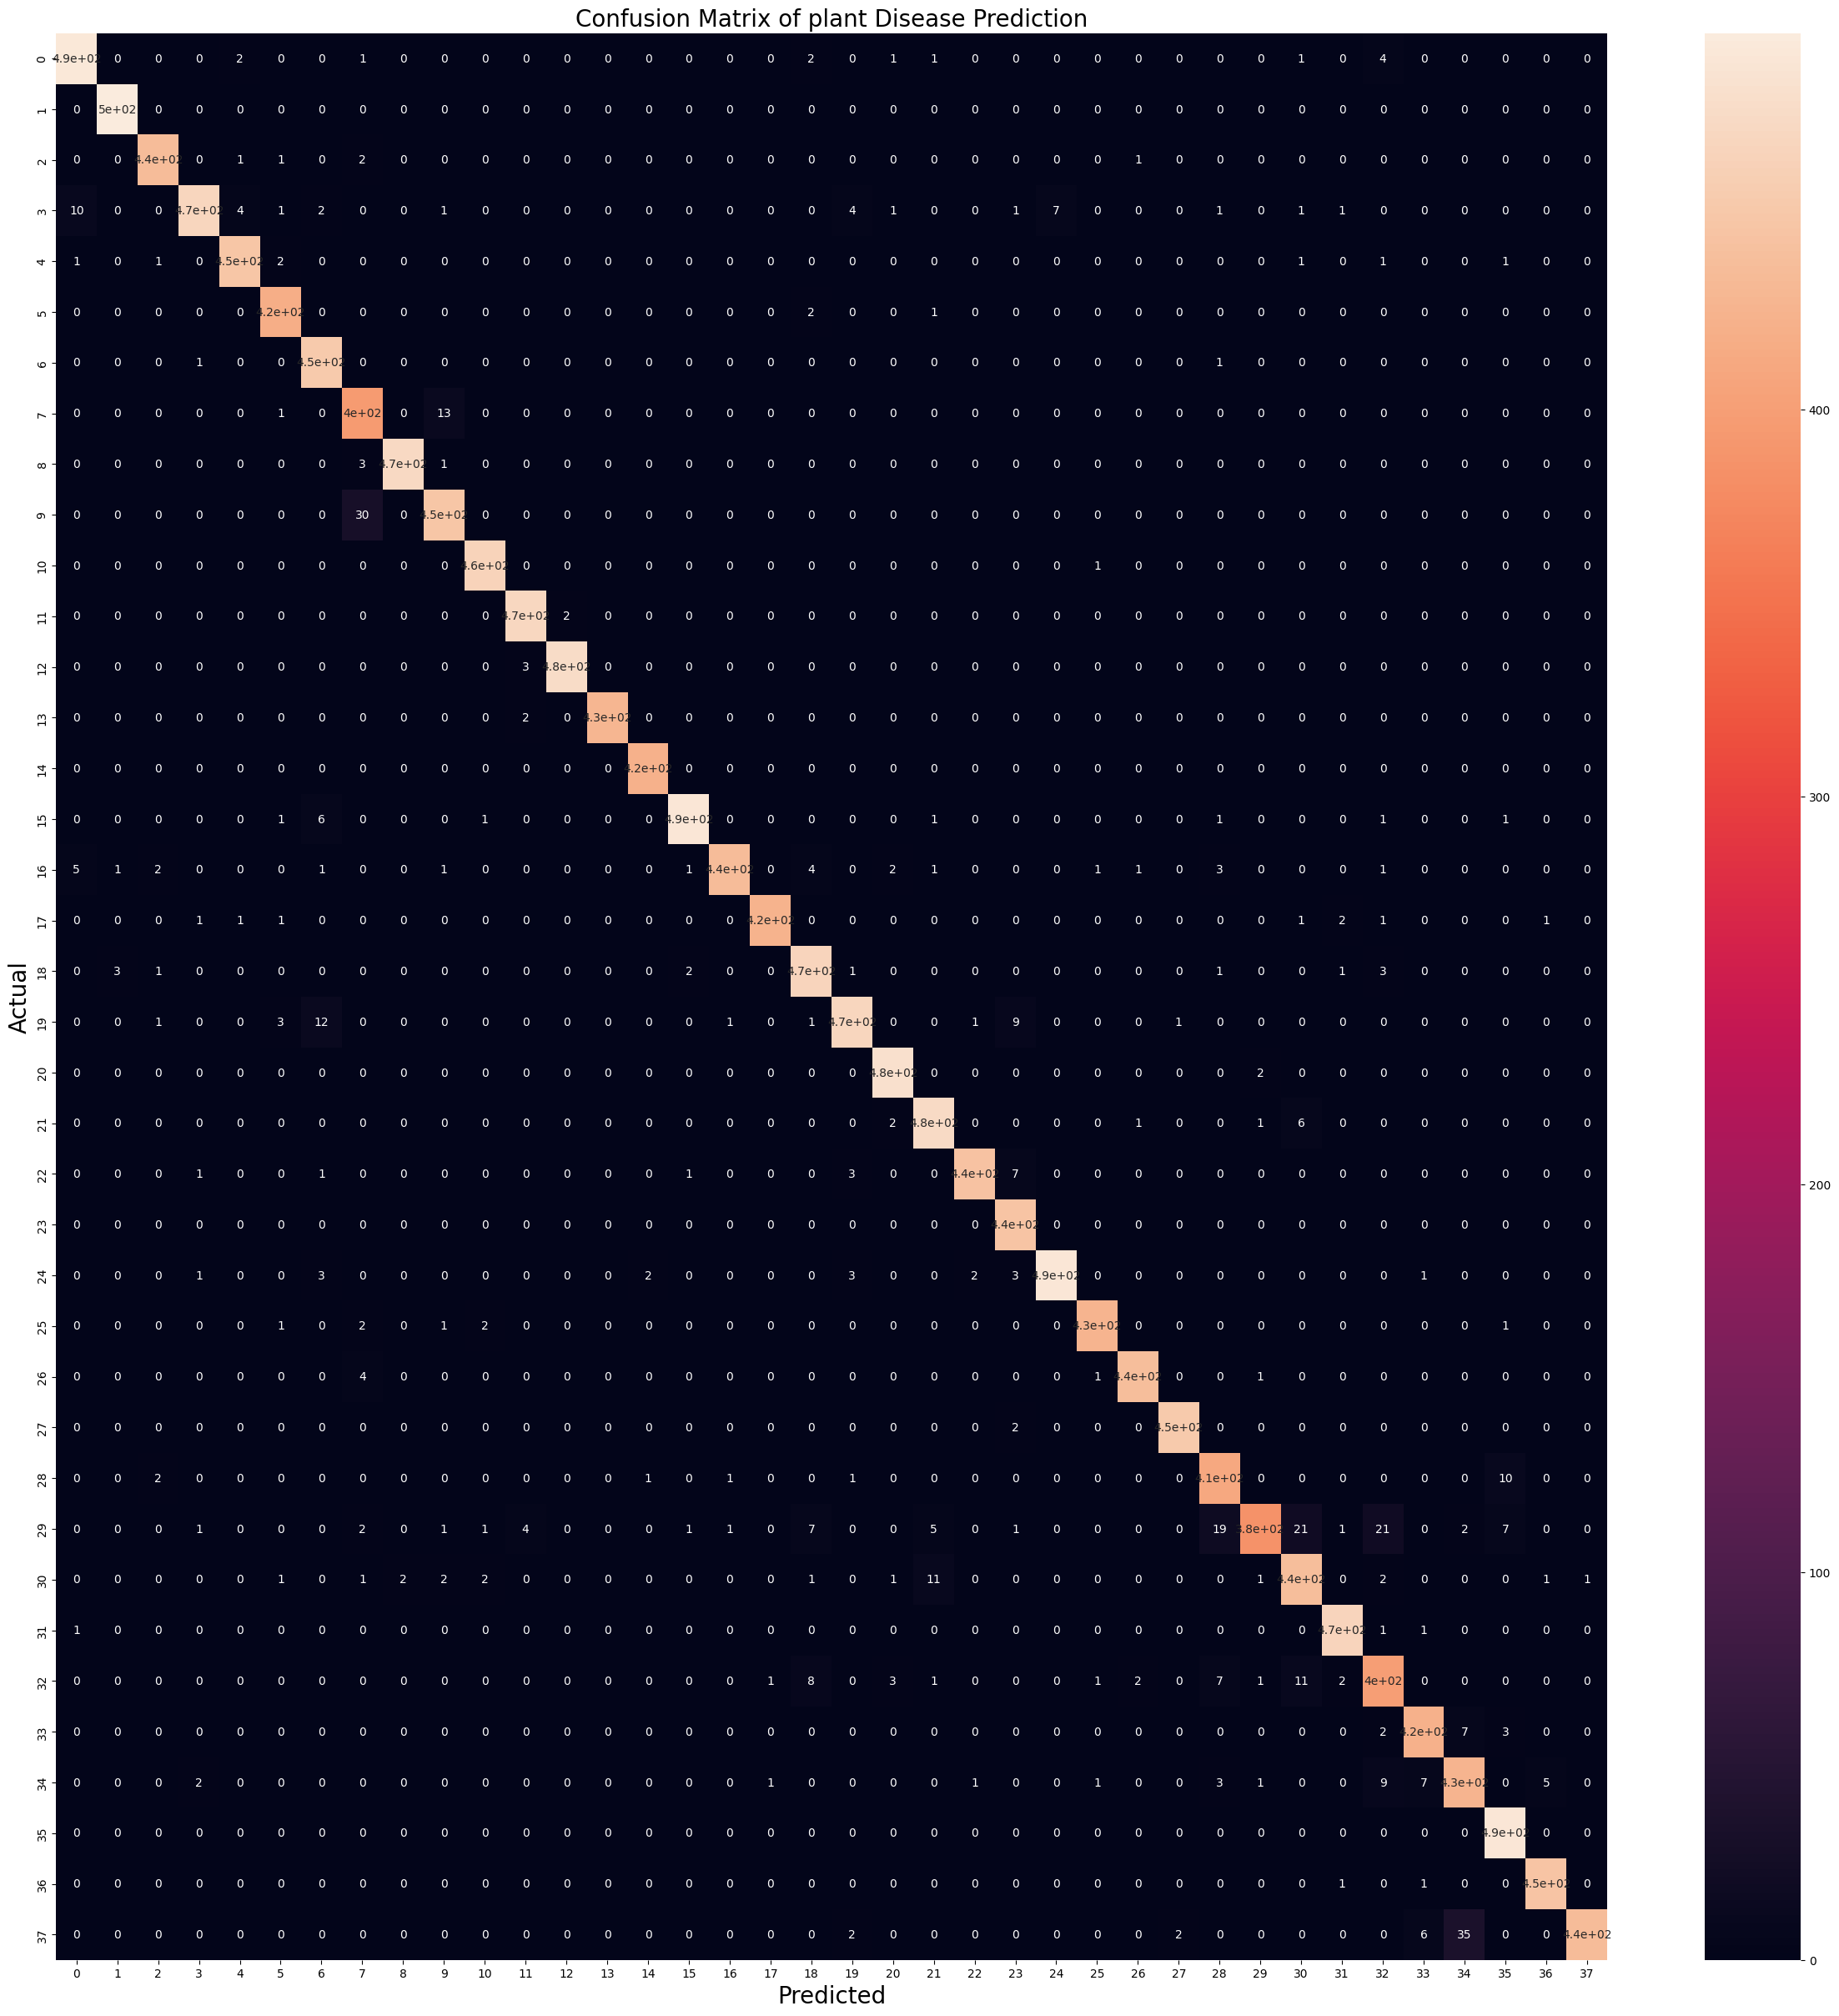

In [55]:
plt.figure(figsize=(30,30))
sns.heatmap(CM,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize =20)
plt.title("Confusion Matrix of plant Disease Prediction",fontsize=20)
plt.show()

**Applying Transferlearning to increase the Detection accuracy**

In [56]:
import tensorflow as tf

In [57]:
#Loading and Preprocessing Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [58]:
train_generator = train_datagen.flow_from_directory(
    'plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    'plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


**Loading Pre-trained ResNet50 Model**

In [59]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [60]:
# Loading the pre-trained ResNet50 model without the top layer as we use the Trained knowledge of ResNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [61]:
# Adding custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  #global average pooling layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Adjusting output layer


In [62]:
#final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freezing all layers in the base ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#model summary
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,665,574 (90.28 MB)

 Trainable params: 77,862 (304.15 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

**Training the Model**

In [65]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)

Epoch 1/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 737s 335ms/step - accuracy: 0.0829 - loss: 3.5299 - val_accuracy: 0.1378 - val_loss: 3.4090
Epoch 2/5
   1/2196 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.0625 - loss: 3.4658

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0625 - loss: 3.4658 - val_accuracy: 0.0000e+00 - val_loss: 3.4498
Epoch 3/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 731s 332ms/step - accuracy: 0.1221 - loss: 3.4353 - val_accuracy: 0.1745 - val_loss: 3.3204
Epoch 4/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accuracy: 0.0938 - loss: 3.3534 - val_accuracy: 0.0000e+00 - val_loss: 3.3960
Epoch 5/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 736s 334ms/step - accuracy: 0.1553 - loss: 3.3650 - val_accuracy: 0.2172 - val_loss: 3.2478


**Adding the health suggestions**

In [66]:
health_suggestions = {
    'Apple___Apple_scab': "Prune infected leaves, apply fungicide, and ensure proper air circulation around trees.",
    'Apple___Black_rot': "Remove infected fruit and branches, use fungicide, and keep the orchard clean.",
    'Apple___Cedar_apple_rust': "Remove nearby cedar trees, use rust-resistant varieties, and apply fungicide.",
    'Apple___healthy': "No issues detected. Maintain regular watering and fertilization.",

    'Blueberry___healthy': "No issues detected. Ensure soil acidity is appropriate and provide adequate water.",

    'Cherry_(including_sour)___Powdery_mildew': "Use fungicide, avoid overhead watering, and prune affected areas.",
    'Cherry_(including_sour)___healthy': "No issues detected. Continue with regular care and monitoring.",

    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': "Use fungicide, rotate crops, and remove infected debris.",
    'Corn_(maize)___Common_rust_': "Apply fungicide and use rust-resistant varieties.",
    'Corn_(maize)___Northern_Leaf_Blight': "Use resistant hybrids, rotate crops, and apply fungicide if necessary.",
    'Corn_(maize)___healthy': "No issues detected. Maintain regular care for optimal growth.",

    'Grape___Black_rot': "Remove and destroy infected leaves and fruit, and apply fungicide.",
    'Grape___Esca_(Black_Measles)': "Prune infected vines, ensure proper irrigation, and avoid over-fertilizing.",
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': "Use fungicide, prune affected areas, and ensure good air circulation.",
    'Grape___healthy': "No issues detected. Regular monitoring and care are recommended.",

    'Orange___Haunglongbing_(Citrus_greening)': "Remove infected trees, use resistant rootstocks, and control insect vectors.",

    'Peach___Bacterial_spot': "Apply copper-based bactericides, prune infected areas, and avoid overhead irrigation.",
    'Peach___healthy': "No issues detected. Continue with regular watering and care.",

    'Pepper,_bell___Bacterial_spot': "Use copper-based fungicide, rotate crops, and remove infected plants.",
    'Pepper,_bell___healthy': "No issues detected. Maintain consistent watering and nutrient supply.",

    'Potato___Early_blight': "Use fungicide, rotate crops, and remove plant debris after harvest.",
    'Potato___Late_blight': "Apply fungicide and practice crop rotation to minimize disease spread.",
    'Potato___healthy': "No issues detected. Ensure proper soil health and pest control.",

    'Raspberry___healthy': "No issues detected. Keep monitoring for pests and diseases.",

    'Soybean___healthy': "No issues detected. Regular crop rotation and pest monitoring are essential.",

    'Squash___Powdery_mildew': "Use fungicide, water at the base of the plant, and ensure good air circulation.",

    'Strawberry___Leaf_scorch': "Remove infected leaves, avoid overhead watering, and apply fungicide.",
    'Strawberry___healthy': "No issues detected. Continue regular monitoring and care.",

    'Tomato___Bacterial_spot': "Use copper-based sprays, avoid wetting leaves, and remove infected plants.",
    'Tomato___Early_blight': "Apply fungicide, remove affected leaves, and mulch plants to prevent soil splashing.",
    'Tomato___Late_blight': "Remove infected plants immediately, use fungicide, and avoid overhead irrigation.",
    'Tomato___Leaf_Mold': "Improve air circulation, use resistant varieties, and apply fungicide if necessary.",
    'Tomato___Septoria_leaf_spot': "Prune affected leaves, avoid overhead watering, and use fungicide.",
    'Tomato___Spider_mites Two-spotted_spider_mite': "Use insecticidal soap, keep plants well-watered, and encourage natural predators.",
    'Tomato___Target_Spot': "Apply fungicide and remove diseased leaves to prevent spread.",
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': "Remove infected plants and control whiteflies with insecticidal soap.",
    'Tomato___Tomato_mosaic_virus': "Remove infected plants, disinfect tools, and avoid smoking near plants.",
    'Tomato___healthy': "No issues detected. Continue regular care and monitoring."
}


# Example output after detection (assuming you have a predicted disease)
detected_disease = "Tomato___healthy"  # Replace this with the model's prediction

# Fetch the health suggestion
suggestion = health_suggestions.get(detected_disease, "No suggestion available.")
print(f"Health Suggestion for {detected_disease}: {suggestion}")


Health Suggestion for Tomato___healthy: No issues detected. Continue regular care and monitoring.


In [68]:
from sklearn.metrics import classification_report

# Assuming Y_true and predicted_categories are defined from your previous code
report = classification_report(Y_true, predicted_categories, target_names=class_name, output_dict=True)

# Print precision, recall, F1-score, and support for each class
for class_name in report:
  if class_name != 'accuracy':
    print(f"Class: {class_name}")
    print(f"  Precision: {report[class_name]['precision']}")
    print(f"  Recall: {report[class_name]['recall']}")
    print(f"  F1-score: {report[class_name]['f1-score']}")
    print(f"  Support: {report[class_name]['support']}")

# Print overall accuracy
print(f"Overall Accuracy: {report['accuracy']}")


Class: Apple___Apple_scab
  Precision: 0.9666011787819253
  Recall: 0.9761904761904762
  F1-score: 0.9713721618953604
  Support: 504.0
Class: Apple___Black_rot
  Precision: 0.9920159680638723
  Recall: 1.0
  F1-score: 0.9959919839679359
  Support: 497.0
Class: Apple___Cedar_apple_rust
  Precision: 0.9841628959276018
  Recall: 0.9886363636363636
  F1-score: 0.9863945578231292
  Support: 440.0
Class: Apple___healthy
  Precision: 0.9852631578947368
  Recall: 0.9322709163346613
  F1-score: 0.9580348004094166
  Support: 502.0
Class: Blueberry___healthy
  Precision: 0.9824175824175824
  Recall: 0.9845814977973568
  F1-score: 0.9834983498349835
  Support: 454.0
Class: Cherry_(including_sour)___Powdery_mildew
  Precision: 0.9720930232558139
  Recall: 0.9928741092636579
  F1-score: 0.982373678025852
  Support: 421.0
Class: Cherry_(including_sour)___healthy
  Precision: 0.9478079331941545
  Recall: 0.9956140350877193
  F1-score: 0.9711229946524064
  Support: 456.0
Class: Corn_(maize)___Cercospor

In [67]:
# Save the trained model
model.save('/content/plant_health_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

550/550 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.2080 - loss: 3.2488
Validation Accuracy: 21.72%
